<a href="https://colab.research.google.com/github/muscak/Simple-Linear-Regression/blob/main/Store_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Store Sales Prediction
The purpose of this study is to learn about linear regression using Scikit-Learn package. It's mainly based on the book [Machine Learning Mastery with Python](https://machinelearningmastery.com/machine-learning-with-python/) of Jason Brownlee.<br>
It's going to be a real life example about car sales. Data is messy so we need to
1. Visualize the dataset with different methods
2. Preprocess the dataset and introduce MinMax Scaling
3. Create linear and non-linear different models and compare them
4. Introduce different regression metrics

What we would like to do is predict the sales of a store depending on it's specifications.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set(style="whitegrid")

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

In [2]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

Mounted at /content/gdrive


##Load the raw data

In [3]:
# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Linear Regression/Data/Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


###Context
A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

###Content
In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

- Store ID: (Index) ID of the particular store.
- Store_Area: Physical Area of the store in yard square.
- Items_Available: Number of different items available in the corresponding store.
- DailyCustomerCount: Number of customers who visited to stores on an average over month.
- Store_Sales: Sales in (US $) that stores made.

For futher detail visit [Kaggle page](https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data).

##Preprocessing

###Exploring the descriptive statistics of the variables

In [4]:
# Including descriptives for categorical features too
df.describe(include='all')

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


###Observations:
- We have 896 enteries for each feature and it seems there are no NULL values.
- We don't need 'Store ID' as it's index. It can be dropped from the dataset.
- The range of min and max values is wide so these features requires standardization.

###Determining the features of interest

In [5]:
data = df.drop(['Store ID '], axis='columns')
data.describe(include='all')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


###Dealing with missing values

In [6]:
data.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

###Exploring Probability Distributions Functions (PDFs)

For optimal results we'd be looking for normal distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Store Sales')

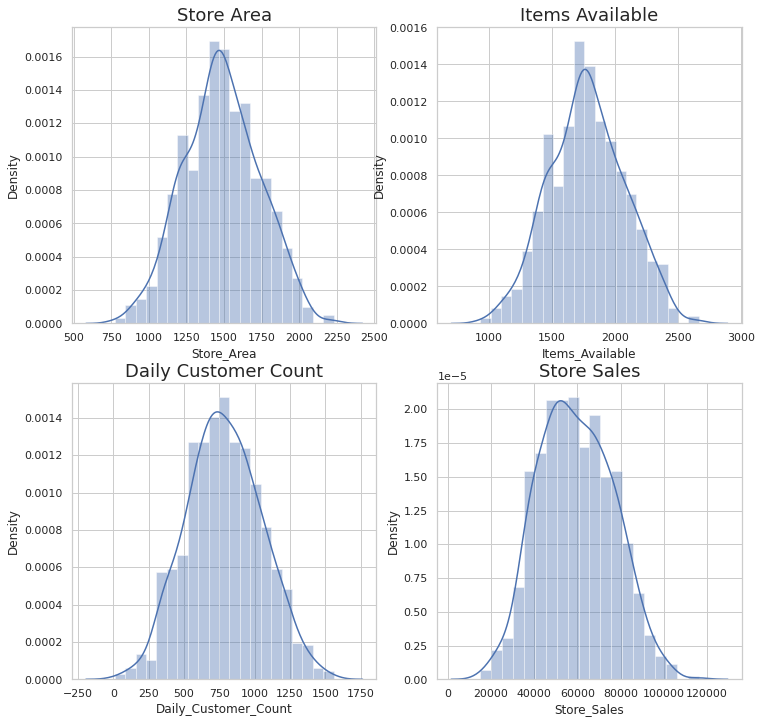

In [7]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1)
sb.distplot(data['Store_Area'])
ax1.set_title('Store Area', size=18)

ax2 = fig.add_subplot(2, 2, 2)
sb.distplot(data['Items_Available'])
ax2.set_title('Items Available', size=18)

ax3 = fig.add_subplot(2, 2, 3)
sb.distplot(data['Daily_Customer_Count'])
ax3.set_title('Daily Customer Count', size=18)

ax4 = fig.add_subplot(2, 2, 4)
sb.distplot(data['Store_Sales'])
ax4.set_title('Store Sales', size=18)

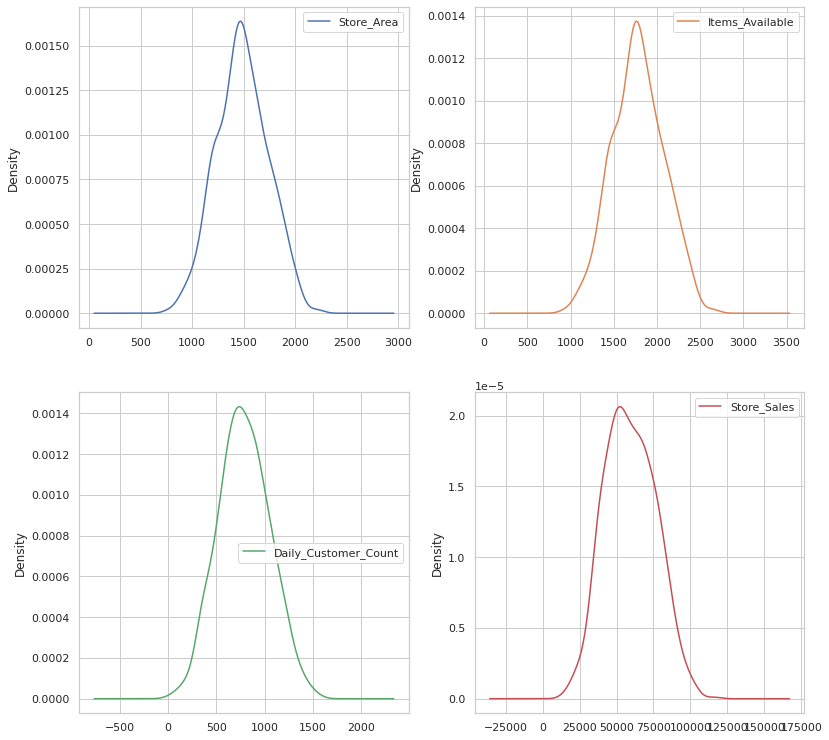

In [8]:
# Another method to display the distribution

data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(13,13))
plt.show()

In [9]:
skew = data.skew()
print(skew)

Store_Area              0.030367
Items_Available         0.034439
Daily_Customer_Count    0.074633
Store_Sales             0.148794
dtype: float64


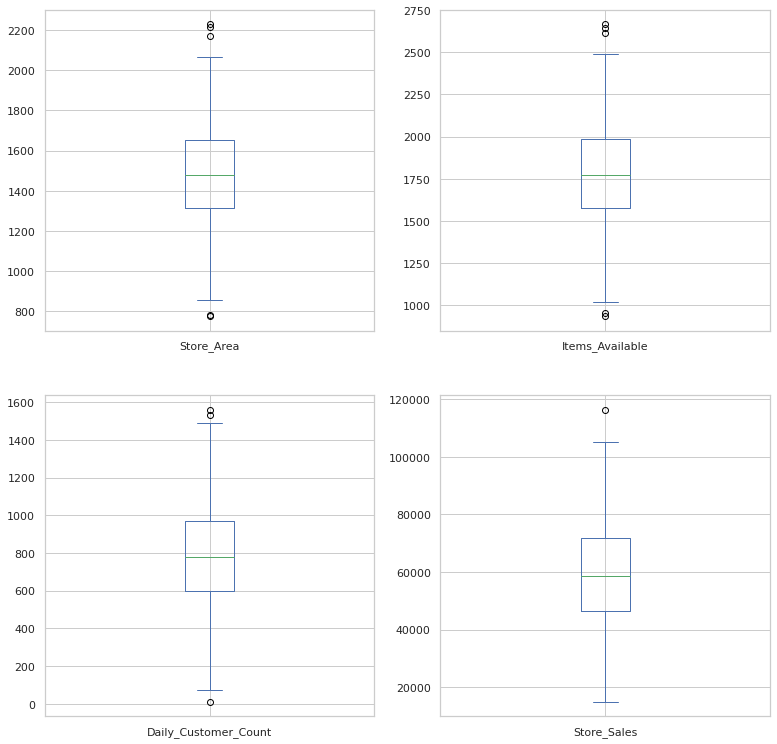

In [10]:
# Box plot for outlier detection

data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, figsize=(13,13))
plt.show()

###Observations:

It seems that the features follows normal distribution and there not much of outliers.

##Creating the regression model

###Train-Test Split 

In [11]:
x = data.drop(['Store_Sales'], axis='columns')
y = data['Store_Sales']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

###Regression

In [13]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [14]:
#R-Squared
print('R-Squared: %.4f' % reg.score(x_train, y_train))

R-Squared: 0.0087


####Different Metrics

**Mean Absolute Error (MAE):** MAE is a measure of errors between paired observations such as predicted and actual values.<br><br>
$MAE = \frac{\sum_{i=1}^n|y_i - \overline{y_i}|}{n}$


**Mean Squared Error (MSE):** MSE tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.<br><br>
$MSE = \frac{\sum_{i=1}^n(y_i - \overline{y_i})^2}{n}$<br><br>

The smaller the MSE and MAE is the better.

In [15]:
# Mean Absolute Error and Mean Squared Error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_hat = reg.predict(x_train)

print('MAE: %.4f' % mean_absolute_error(y_train, y_hat))
print('MSE: %.4f' % mean_squared_error(y_train, y_hat))

MAE: 14276.1457
MSE: 293805481.4029


###Scale the data

We need to scale the data even though the features are in normal distribution, they are not on a relatively similar scale.

We'll apply MinMAx scaler as it generally changes the range of the values. The shape of the distribution doesn’t change. [This article](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) expresses it "*Think about how a scale model of a building has the same proportions as the original, just smaller.*" The range is often set at 0 to 1.


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In our case, we need to scale not only input variables but also the target variable.

In [17]:
scaler = MinMaxScaler()
scaler.fit(y_train.to_numpy().reshape(-1, 1)) # We have to reshape the target since it's single input (1 column or 1D array)
y_train_scaled = scaler.transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.to_numpy().reshape(-1, 1))

In [18]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train_scaled)

#R-Squared
print('R-Squared: %.4f' % reg.score(x_train_scaled, y_train_scaled))

y_hat_scaled = reg.predict(x_train_scaled)

print('MAE: %.4f' % mean_absolute_error(y_train_scaled, y_hat_scaled))
print('MSE: %.4f' % mean_squared_error(y_train_scaled, y_hat_scaled))

R-Squared: 0.0087
MAE: 0.1408
MSE: 0.0286


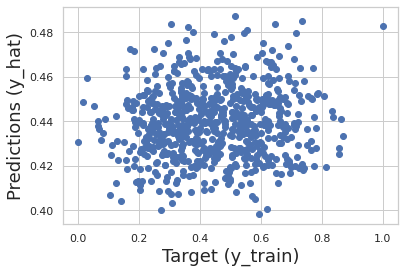

In [19]:
plt.scatter(y_train_scaled, y_hat_scaled)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

Residual plot is another type of check the performance of the model.
Residual means difference between the target and the predictions, therefore, residuals are estimates of errors.
Residual plots refer to the the distributions of the residuals.

From the normality assumption, we know that the error should follow normal distribution with the mean of 0.

Below graph looks like normally distributed with a mean of 0. However, there is a much longer tail on the negative side. There are observations that y_train - y_hat is much lower than the mean. Therefore, a much higher price is predicted than the observed. These predictions tend to over estimate the target.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

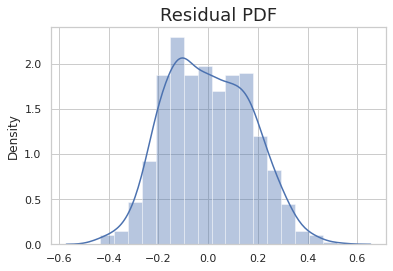

In [20]:
sb.distplot(y_train_scaled - y_hat_scaled)
plt.title('Residual PDF', size=18)

##Another Method: Support Vector Regressor

As you may see on the scatter plot of the predicted and the actual values it's hard to catch a linear relation. Let's try a non-linear method.

The most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian SVR. We have a non-linear condition so we'll select polynomial or gaussian but here we select RBF (a gaussian type) kernel*.

*[Support Vector Regression in 6 Steps with Python](https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d)

In [21]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_scaled, y_train_scaled)

#R-Squared
print('R-Squared: %.4f' % svr_reg.score(x_train_scaled, y_train_scaled))

y_hat_scaled = svr_reg.predict(x_train_scaled)

print('MAE: %.4f' % mean_absolute_error(y_train_scaled, y_hat_scaled))
print('MSE: %.4f' % mean_squared_error(y_train_scaled, y_hat_scaled))

R-Squared: 0.0479
MAE: 0.1369
MSE: 0.0274


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####Result:

Since the relation between dependent and independent variables are not linear, as you can see SVR which is a non-linear method provides better metrics than LinearRegression.

Let's compare different type of methods.

In [22]:
from sklearn.linear_model import Lasso            # A linear method Lasso Regression
from sklearn.linear_model import ElasticNet       # A linear method ElasticNet Regression
from sklearn.neighbors import KNeighborsRegressor # A non-linear method k-Nearest Neighbor Regression
from sklearn.tree import DecisionTreeRegressor    # A non-linear method Decision Tree Regression

In [38]:
# Prepare models as a list
models = []
names = []
models.append(('LR', LinearRegression()))
models.append(('LS', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('KN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))

In [51]:
# Creating a dataframe to store the results
df_results = pd.DataFrame(columns=['Algorithm', 'R2', 'MAE', 'MSE'])

In [52]:
# Fitting all models in a for loop
for name, model in models:
  model.fit(x_train_scaled, y_train_scaled)
  r2 = model.score(x_train_scaled, y_train_scaled)
  y_hat_scaled = model.predict(x_train_scaled)
  mae = mean_absolute_error(y_train_scaled, y_hat_scaled)
  mse = mean_squared_error(y_train_scaled, y_hat_scaled)
  result = {'Algorithm': name, 'R2': r2, 'MAE': mae, 'MSE': mse}
  df_results = df_results.append(result, ignore_index=True)

df_results = df_results.set_index('Algorithm')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# Printing different metrics for each model sorted by R2
df_results.sort_values(by=['R2'])

,R2,MAE,MSE
Algorithm,,,
LS,0.000000,0.141752,0.028825
EN,0.000000,0.141752,0.028825
LR,0.008666,0.140790,0.028575
SVR,0.047924,0.136933,0.027443
KN,0.215700,0.124447,0.022607
DT,1.000000,0.000000,0.000000


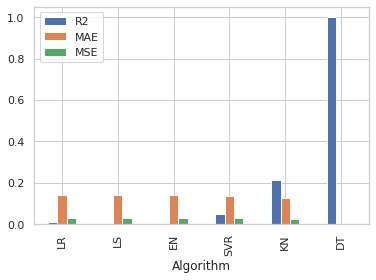

In [54]:
df_results.plot(kind='bar')
plt.show()

###Testing
It seems that Decision Tree is the best performing algorothim. Let's test it using the test dataset.

In [67]:
model = KNeighborsRegressor()
model.fit(x_train_scaled, y_train_scaled)

KNeighborsRegressor()

In [68]:
y_hat_test = model.predict(x_test_scaled)

#R-Squared
print('R-Squared: %.4f' % model.score(x_test_scaled, y_test_scaled))
print('MAE: %.4f' % mean_absolute_error(y_test_scaled, y_hat_test))
print('MSE: %.4f' % mean_squared_error(y_test_scaled, y_hat_test))

R-Squared: -0.1551
MAE: 0.1412
MSE: 0.0326


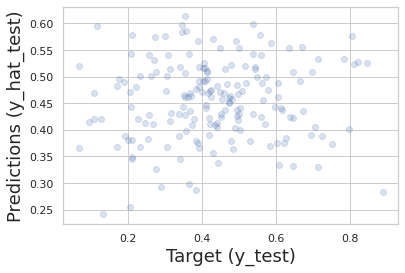

In [69]:
plt.scatter(y_test_scaled, y_hat_test, alpha=0.2) 
# We added alpha to show the proportional opacity of the points.
# The more saturated the colour, the higher the concentration of points.
# The paler the colour, the lower the concentration points.
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [70]:
# DataFrame Performance (df_pf)
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf['Targets'] = y_test_scaled
df_pf.head()

,Predictions,Targets
0,0.496075,0.175740
1,0.388876,0.724753
2,0.574951,0.273176
3,0.464241,0.477120
4,0.283807,0.889842


In [71]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf.head()

,Predictions,Targets,Residuals,Difference%
0,0.496075,0.175740,-0.320335,182.278339
1,0.388876,0.724753,0.335878,46.343720
2,0.574951,0.273176,-0.301775,110.469314
3,0.464241,0.477120,0.012880,2.699463
4,0.283807,0.889842,0.606036,68.105951


In [72]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference%
count,180.000000,180.000000,180.000000,180.000000
mean,0.455346,0.431429,-0.023917,49.679958
std,0.073528,0.168383,0.179372,82.181145
min,0.241361,0.066371,-0.478757,0.556190
25%,0.409576,0.332051,-0.133708,11.224903
50%,0.461371,0.420513,-0.035611,25.354771
75%,0.509290,0.538979,0.076519,50.696190
max,0.613018,0.889842,0.606036,684.427935


In [73]:
pd.options.display.max_rows = 999 # Set the lenght of the rows to be displayed.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residuals,Difference%
103,0.52,0.52,-0.00,0.56
28,0.54,0.54,-0.00,0.57
68,0.46,0.45,-0.00,0.91
73,0.42,0.42,-0.00,0.96
110,0.29,0.29,-0.00,0.97
105,0.35,0.34,-0.00,1.10
80,0.38,0.38,0.01,1.58
104,0.47,0.46,-0.01,1.91
23,0.48,0.49,0.01,2.04
76,0.41,0.42,0.01,2.59


At the bottom of the list, you may see there are some predictions that are far from the actual price. Residuals are negative for these predictions meaning that the predictions are higher than the targets. We might be missing an important factor or maybe it's the effect of the outliers.